<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 9: Filterung
## Synthetischer Brockenpluton: Upward continuation via FFT
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

We use a synthetic data set of the **Brocken pluton** for testing our filter algorithms.
<img src="figures/brockenpluton.jpg" style=width:10cm>

Our tasks are:
- create irregular synthetic data, add random noise, add linear trend
- create gridd data from irregular data
- detrend data (least squares fit)
- upward continuation of data (FFT)
- spatial derivatives of data (FFT)
- ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import lib_modelling
tiny=1e-15

In [2]:
lib_modelling.change_fontsize(SMALL_SIZE=12)

----
We first **load** gridded data created in the last notebook...

In [3]:
infile = 'Brocken_detrended.npy'
data = np.load(infile)    
print(data.shape)
X = data[0,:,:]
Y = data[1,:,:]
boug = data[2,:,:]

(3, 100, 100)


In [4]:
xmin = X.min()
xmax = X.max()
ymin = Y.min()
ymax = Y.max()
nx = X.shape[0]
ny = Y.shape[1]
print(xmin,xmax,ymin,ymax,nx,ny)

-50000.0 50000.0 -50000.0 50000.0 100 100


----
## Create 2D wavenumber field

...

In [5]:
kx     = (-nx/2 + np.arange(0,nx))*2*np.pi/(xmax-xmin)
ky     = (-ny/2 + np.arange(0,ny))*2*np.pi/(ymax-ymin)
KX, KY = np.meshgrid(kx, ky)
print(KX.shape,KY.shape)

(100, 100) (100, 100)


### Forward FFT of Bouguer gravity data

In [6]:
# forward 2D FFT
F      = np.fft.fft2(boug)
F      = np.fft.fftshift(F)  # Shift the zero-frequency component to the center of the spectrum.
power  = np.abs(F)**2
power  = 20*np.log10((power+tiny)/power.max())
F      = np.fft.ifftshift(F)

print(F.shape)

(100, 100)


### Upward continuation as filter in spectral domain
$$
\cal{F}[g_{up}] = \cal{F}[g] \cal{F}[\Psi_{up}]
$$
$$
\cal{F}[\Psi_{up}] = e^{-|k|z}
$$
$$
k = \sqrt{k_x^2 + k_y^2}
$$

(100, 100)


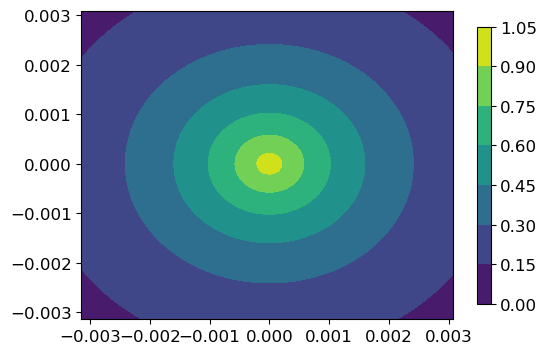

In [7]:
K = np.sqrt(KX**2 + KY**2)
deltaz = 500.
print(K.shape)
Fup = np.exp(-K*deltaz)

fig,axs = plt.subplots(1,1,figsize=(6.0,4.0))
CS1=axs.contourf(KX,KY,Fup)
cbar = fig.colorbar(CS1,ax=axs,location="right",shrink=0.9)

### Inverse FFT of filtered Bouguer gravity data
Note that we need to shift the filter $F_{up}$ to the wavenumber notation of `numpy.fft`,
because we defined it in our notation ...

In [8]:
# inverse 2D FFT
#F2             = np.fft.ifftshift(F)
F2 = np.copy(F)
boug_upward = np.fft.ifft2(F2*np.fft.fftshift(Fup)).real

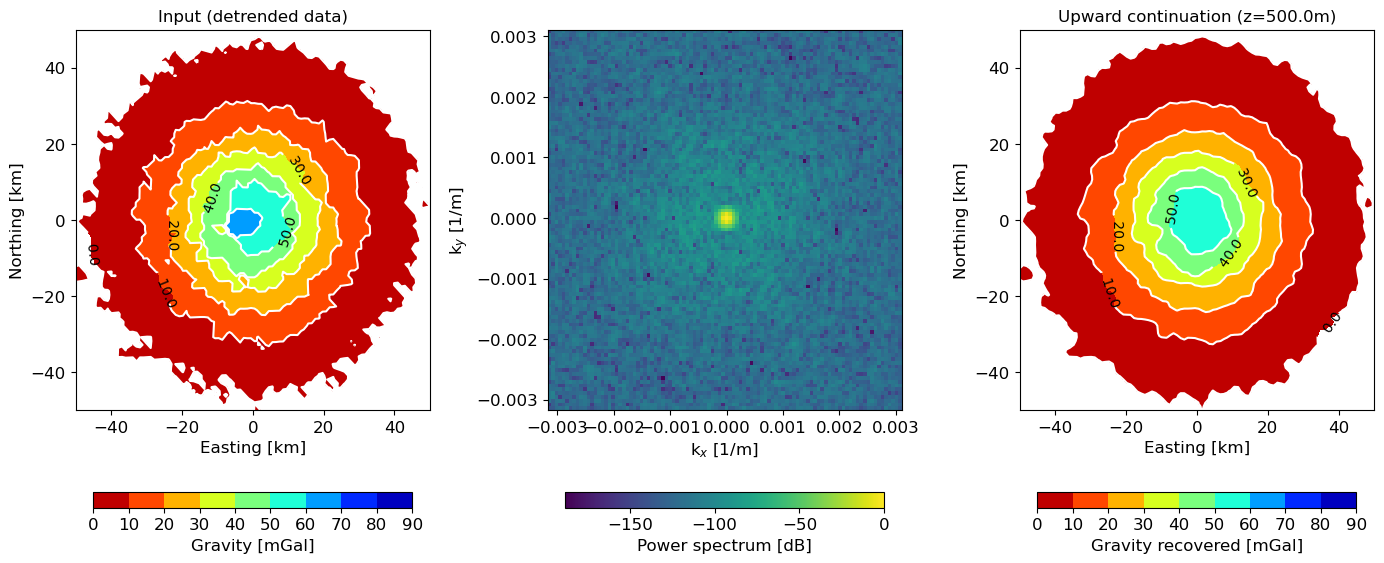

In [9]:
fig,axs = plt.subplots(1,3,figsize=(14.0,6.0))
color_levels=[0,10,20,30,40,50,60,70,80,90]

axs[0].set_title('Input (detrended data)')
axs[0].set_xlabel('Easting [km]')
axs[0].set_ylabel('Northing [km]')
CS1=axs[0].contourf(X/1e3, Y/1e3, boug,cmap=plt.cm.jet_r,levels=color_levels)
CS2=axs[0].contour(X/1e3, Y/1e3, boug,colors='white',levels=color_levels)
axs[0].clabel(CS2, inline=1, fontsize=10,fmt='%5.1f',colors='black')
cbar = fig.colorbar(CS1,ax=axs[0],orientation="horizontal",shrink=0.9)
cbar.ax.set_xlabel('Gravity [mGal]')

axs[1].set_xlabel('k$_x$ [1/m]')
axs[1].set_ylabel('k$_y$ [1/m]')
#CS5=axs[1].pcolormesh(KX,KY,np.abs(F))
CS5=axs[1].pcolormesh(KX,KY,power)
cbar = fig.colorbar(CS5,ax=axs[1],orientation="horizontal",shrink=0.9)
cbar.ax.set_xlabel('Power spectrum [dB]')

axs[2].set_title('Upward continuation (z='+str(deltaz)+'m)')
axs[2].set_xlabel('Easting [km]')
axs[2].set_ylabel('Northing [km]')
CS3=axs[2].contourf(X/1e3, Y/1e3, boug_upward,cmap=plt.cm.jet_r,levels=color_levels)
CS4=axs[2].contour(X/1e3, Y/1e3, boug_upward,colors='white',levels=color_levels)
axs[2].clabel(CS4, inline=1, fontsize=10,fmt='%5.1f',colors='black')
cbar = fig.colorbar(CS3,ax=axs[2],orientation="horizontal",shrink=0.9)
cbar.ax.set_xlabel('Gravity recovered [mGal]')

plt.tight_layout()

----
## Save data to file

In [10]:
# save to file
outfile =  'Brocken_FFTupward.npy'
np.save(outfile,[X,Y,boug_upward])

[next>](AGII_chap09_Brocken_FFThorizontalderivative.ipynb)

----